# Generate Position-Only Test Data (start with the blank display)

In [6]:
import sys
import numpy as np
import random
from tqdm import tqdm

In [9]:
img_height = 5
img_width = 5
min_blobs = 1
max_blobs = 9
num_labels = max_blobs - min_blobs + 1
num_sequences = 1000

n_hidden = img_height*img_width
unit_std = 0.3 # standard deviation for activated units
all_indices = [x for x in range(0, n_hidden)] # possible activated unit position

In [24]:
def get_img(N, n_hidden, unit_std):
    """
    Create an image with N activated units.
    """
    
    img = np.zeros(img_height*img_width) # initialize empty image
    indices = random.sample(all_indices, N)
    
    for index in indices:
        img[index] = np.random.normal(1.0, unit_std, 1)[0]

    return img, indices

def get_po_images(max_blobs, n_hidden, unit_std):
    """
    Get testing dataset where the only variable is position,
    and 1000 sets of images where units are activated incrementally.
    """
    images = np.zeros([num_sequences, max_blobs-min_blobs+2, img_height*img_width])
    label_scalar = np.zeros([num_sequences, max_blobs-min_blobs+2, 1])
    label_classifier = np.zeros([num_sequences, max_blobs-min_blobs+2, max_blobs-min_blobs+2])

    total_img_cnt = 0
    for sequence_cnt in tqdm(range(num_sequences)):
        for curr_num in range(max_blobs, -1, -1):
            if curr_num is max_blobs:
                img, indices = get_img(curr_num, n_hidden, unit_std)
            else:
                index = indices[curr_num-1]
                img[index] = 0
            images[sequence_cnt, curr_num] = img[:]
            label_scalar[sequence_cnt, curr_num] = curr_num
            label_classifier[sequence_cnt, curr_num, curr_num] = 1

    return images, label_scalar, label_classifier

In [25]:
images, label_scalar, label_classifier = get_po_images(max_blobs, n_hidden, unit_std)

100%|██████████| 1000/1000 [00:00<00:00, 15981.16it/s]


In [52]:
np.shape(images)

(1000, 10, 25)

In [54]:
# save NDS data
#NDS_simple_data = {}
#NDS_simple_data["images"] = images # size (1000, 10, 10000)
#NDS_simple_data["label_scalar"] = label_scalar # size (1000, 10, 1): 0,1,2,...,9
#np.save("/home/mtfang/increments_copy/NDS_simple_data.npy", NDS_simple_data)

# Visualization

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

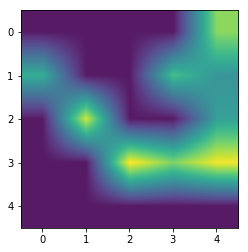

In [42]:
img1_data = images[4][9] #[num_img][num_blob]
img1 = np.reshape(img1_data, [img_height, img_width])
im = plt.imshow(img1, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')

plt.show()

In [17]:
#import pickle
#pickle.dump( (images, label_scalar, label_classifier), open( "po_test.pkl", "wb" ) )
#images, label_scalar, label_classifier = pickle.load( open( "po_test.pkl", "rb" ) )

In [47]:
NDS_data = np.load("NDS_data.npy")
NDS_data = NDS_data.item()
images = NDS_data["images"]
label_saclar = NDS_data["label_scalar"] 

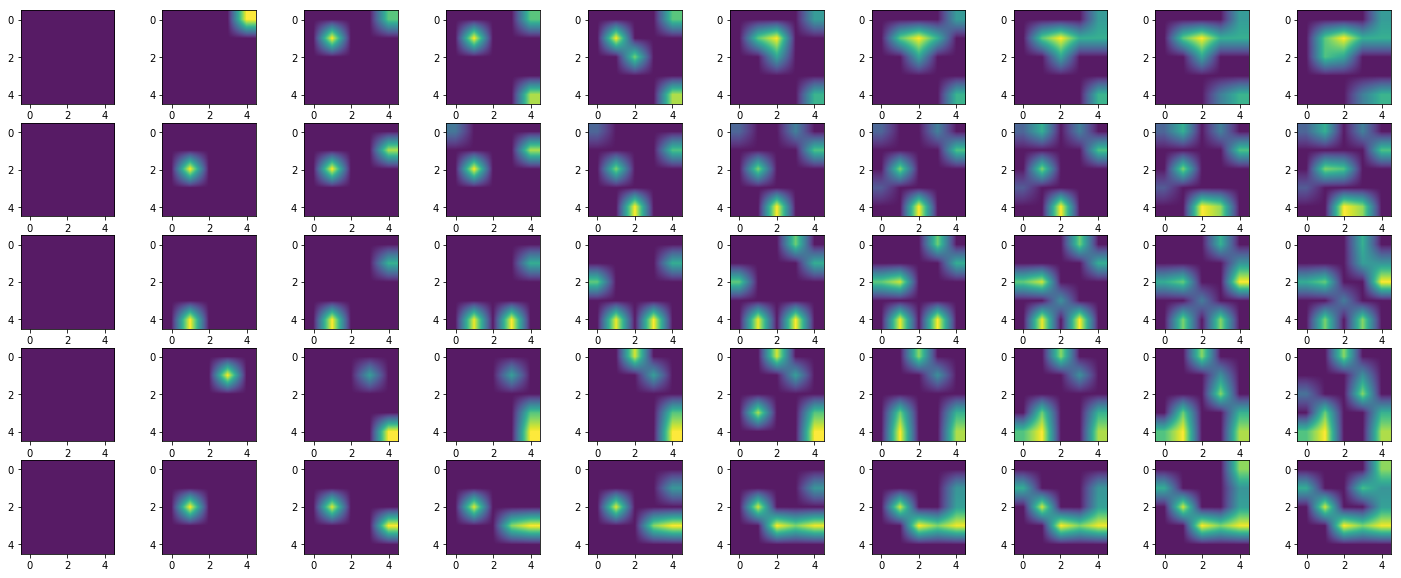

In [47]:
num_sequences_to_plot = 5
fig, axs = plt.subplots(num_sequences_to_plot, max_blobs+1, figsize=(25,10))

for sequence_idx in range(num_sequences_to_plot):
    for i in range(max_blobs+1):
        img_data = images[sequence_idx][i] #[num_img][num_blob]
        img = np.reshape(img_data, [img_height, img_width])
        axs[sequence_idx, i].imshow(img, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear') 
plt.show()

In [48]:
label_scalar[0,:,0]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])